# Build a multiple linear regression model

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>

**Part 1:** EDA & Checking Model Assumptions

**Part 2:** Model Building and evaluation

**Part 3:** Interpreting Model Results

<br/>




## Part 1: EDA & Checking Model Assumptions

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import date
from datetime import timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

In [3]:
df = df0.copy()
print(df.shape)
df.info()

(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

In [5]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [16]:
# Convert `to datetime format
df["drop_off"] = pd.to_datetime(df["tpep_dropoff_datetime"], format="%m/%d/%Y %I:%M:%S %p")
df["pick_up"] = pd.to_datetime(df["tpep_pickup_datetime"], format="%m/%d/%Y %I:%M:%S %p")

#create trip duration
df["trip_duration"] = (df["drop_off"] - df["pick_up"])/np.timedelta64(1,"m")


df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,drop_off_converted,pick_up_converted,trip_duration,drop_off,pick_up
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,...,0.5,2.76,0.0,0.3,16.56,2017-03-25 09:09:47,2017-03-25 08:55:43,14.066667,2017-03-25 09:09:47,2017-03-25 08:55:43
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,...,0.5,4.00,0.0,0.3,20.80,2017-04-11 15:19:58,2017-04-11 14:53:28,26.500000,2017-04-11 15:19:58,2017-04-11 14:53:28
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,...,0.5,1.45,0.0,0.3,8.75,2017-12-15 07:34:08,2017-12-15 07:26:56,7.200000,2017-12-15 07:34:08,2017-12-15 07:26:56
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,...,0.5,6.39,0.0,0.3,27.69,2017-05-07 13:48:14,2017-05-07 13:17:59,30.250000,2017-05-07 13:48:14,2017-05-07 13:17:59
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,...,0.5,0.00,0.0,0.3,17.80,2017-04-15 23:49:03,2017-04-15 23:32:20,16.716667,2017-04-15 23:49:03,2017-04-15 23:32:20
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,...,0.5,2.06,0.0,0.3,12.36,2017-03-25 20:42:11,2017-03-25 20:34:11,8.000000,2017-03-25 20:42:11,2017-03-25 20:34:11
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,...,0.5,9.86,0.0,0.3,59.16,2017-05-03 20:03:47,2017-05-03 19:04:09,59.633333,2017-05-03 20:03:47,2017-05-03 19:04:09
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,...,0.5,1.78,0.0,0.3,19.58,2017-08-15 18:03:05,2017-08-15 17:41:06,21.983333,2017-08-15 18:03:05,2017-08-15 17:41:06
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,...,0.5,0.00,0.0,0.3,9.80,2017-02-04 16:29:14,2017-02-04 16:17:07,12.116667,2017-02-04 16:29:14,2017-02-04 16:17:07
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,...,0.5,2.75,0.0,0.3,16.55,2017-11-10 15:40:55,2017-11-10 15:20:29,20.433333,2017-11-10 15:40:55,2017-11-10 15:20:29


### Look for duplicates

In [20]:
# Check for missing data and duplicates
df.isna().sum().sum()

0

In [21]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013777
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996482
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983333
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000


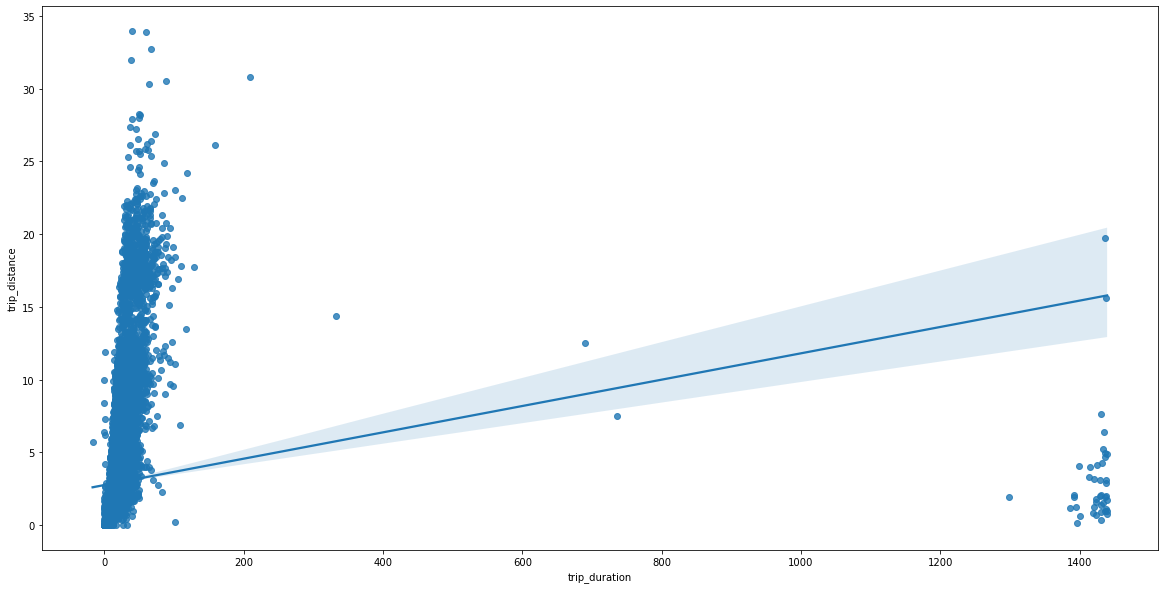

In [27]:
# scatterplot of trip_distance & trip_duration
regplot = plt.figure()
regplot.set_figwidth(20)
regplot.set_figheight(10)
sns.regplot(x =df['trip_duration'], y = df['trip_distance'])

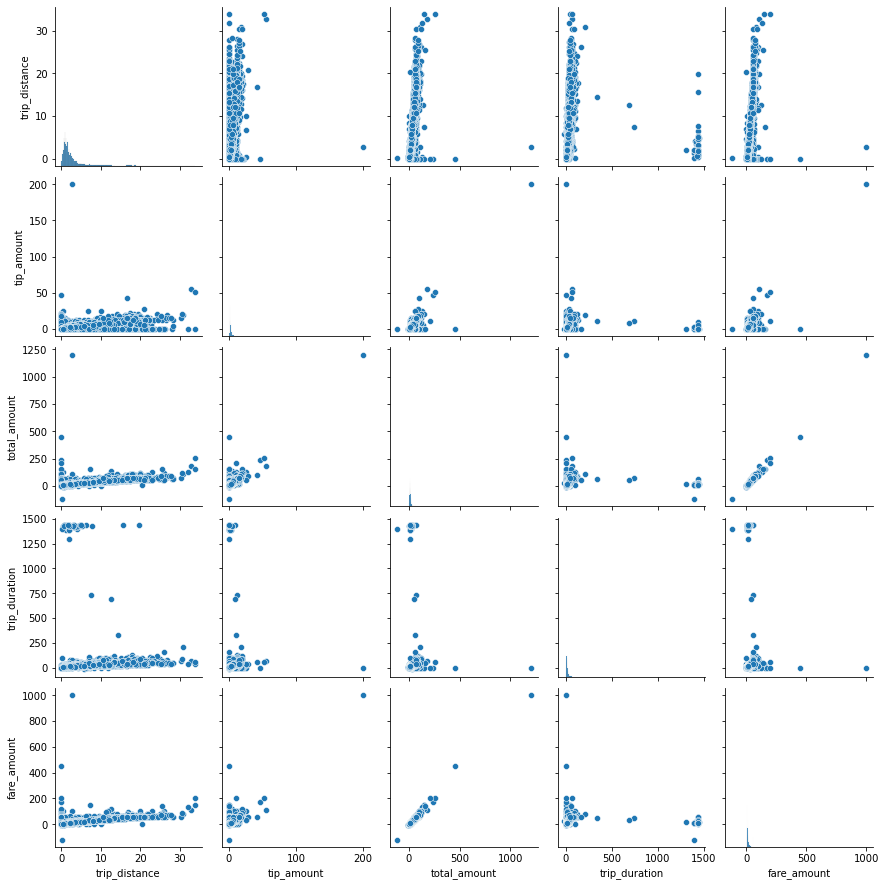

In [28]:
# pairrplot to show relationship between variables
sns.pairplot(df[['trip_distance', 'tip_amount', 'total_amount', 'trip_duration', 'fare_amount']])

### Address outlieres outliers

Text(0.5, 1.0, 'variables with outliers')

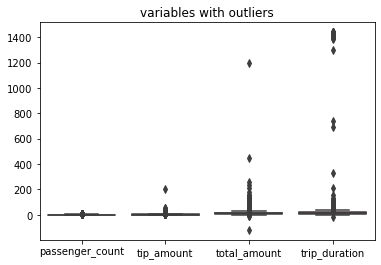

In [30]:
outlier_check = sns.boxplot(data = df[['passenger_count', 'tip_amount', 'total_amount', 'trip_duration']], showfliers = True)
outlier_check.set_title("variables with outliers")

Text(0.5, 1.0, 'variables without outliers')

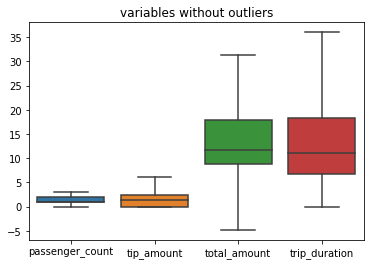

In [31]:
outlier_check = sns.boxplot(data = df[['passenger_count', 'tip_amount', 'total_amount', 'trip_duration']], showfliers = False)
outlier_check.set_title("variables without outliers")

In [36]:
#get quantiles of 'trip_duration'
quantile25 = df['trip_duration'].quantile(0.25)
quantile75 = df['trip_duration'].quantile(0.75)

iqr = (quantile75 - quantile25)

upper_limit = quantile75 + 1.5 * iqr
lower_limit = quantile25 + 1.5 * iqr
print('lower limit:', lower_limit, 'upper limit:' , upper_limit)

lower limit: 24.25 upper limit: 35.983333333333334


In [37]:
#removing trip_duration outliers the way decided
df[df['trip_duration'] > 36] = 36
df[df['trip_duration'] < 0] = 0
df['trip_duration'].describe()

count    22699.000000
mean        13.668828
std          9.245373
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         36.000000
Name: trip_duration, dtype: float64

In [38]:
quantile25 = df['total_amount'].quantile(0.25)
quantile75 = df['total_amount'].quantile(0.75)

iqr = (quantile75 - quantile25)

upper_limit = quantile75 + 1.5 * iqr
lower_limit = quantile25 + 1.5 * iqr
print('lower limit:', lower_limit, 'upper limit:' , upper_limit)

lower limit: 22.325000000000003 upper limit: 31.375


In [39]:
df[df['total_amount'] > 32] = 32
df[df['total_amount'] < 0] = 0
df['total_amount'].describe()

count    22699.000000
mean        14.481228
std          7.985722
min          0.000000
25%          8.750000
50%         11.800000
75%         17.800000
max         32.000000
Name: total_amount, dtype: float64

## Model Building and evaluation

In [40]:
# Build correlation matrix 
df.corr(method = 'pearson')

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
Unnamed: 0,1.000000,-0.481317,-0.477442,-0.477195,-0.482017,0.246150,0.251366,-0.481182,-0.388059,-0.481992,-0.482116,-0.477809,-0.482132,-0.482138,-0.351186,-0.311006
VendorID,-0.481317,1.000000,0.991848,0.986482,0.998629,-0.526237,-0.513196,0.997372,0.815431,0.998017,0.998691,0.989050,0.998268,0.998690,0.737951,0.676771
passenger_count,-0.477442,0.991848,1.000000,0.979487,0.991264,-0.521962,-0.508229,0.990162,0.810410,0.990620,0.991338,0.981633,0.990931,0.991338,0.733307,0.673047
trip_distance,-0.477195,0.986482,0.979487,1.000000,0.987527,-0.528553,-0.519552,0.986164,0.888456,0.987172,0.987662,0.985290,0.987733,0.987656,0.822827,0.750085
RatecodeID,-0.482017,0.998629,0.991264,0.987527,1.000000,-0.525975,-0.513027,0.998668,0.816677,0.999239,0.999911,0.990328,0.999531,0.999923,0.739149,0.677597
PULocationID,0.246150,-0.526237,-0.521962,-0.528553,-0.525975,1.000000,0.344806,-0.525536,-0.457266,-0.525978,-0.526041,-0.521739,-0.526066,-0.526072,-0.418361,-0.380025
DOLocationID,0.251366,-0.513196,-0.508229,-0.519552,-0.513027,0.344806,1.000000,-0.512832,-0.456931,-0.513363,-0.512991,-0.510127,-0.513347,-0.513028,-0.421618,-0.380787
payment_type,-0.481182,0.997372,0.990162,0.986164,0.998668,-0.525536,-0.512832,1.000000,0.814424,0.997997,0.998720,0.984290,0.998334,0.998723,0.731241,0.675499
fare_amount,-0.388059,0.815431,0.810410,0.888456,0.816677,-0.457266,-0.456931,0.814424,1.000000,0.816151,0.816518,0.838561,0.817433,0.816525,0.980834,0.941852
extra,-0.481992,0.998017,0.990620,0.987172,0.999239,-0.525978,-0.513363,0.997997,0.816151,1.000000,0.999326,0.989988,0.998916,0.999326,0.740575,0.677547


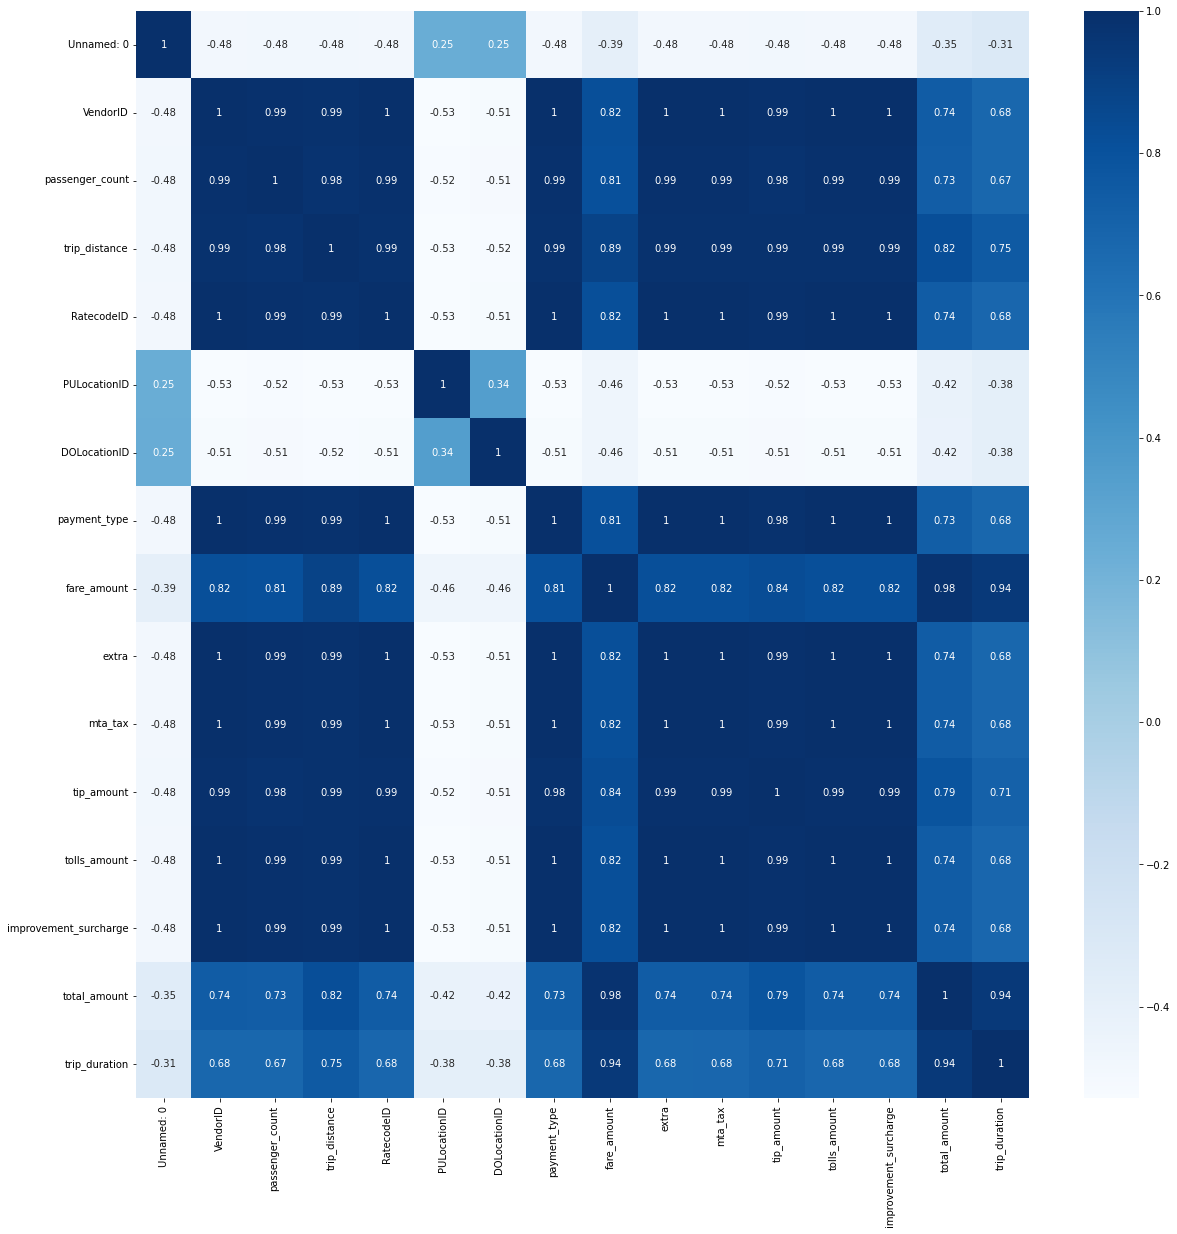

In [45]:
# Create correlation heatmap
plt.figure(figsize =(20,20))
sns.heatmap(df.corr(method = 'pearson'), annot = True, cmap = 'Blues')


In [46]:
#Create variables for the model
Y = df[['trip_duration']]
X = df.drop(columns = 'trip_duration')
X.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,drop_off_converted,pick_up_converted,drop_off,pick_up
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,...,0.0,0.5,2.76,0.0,0.3,16.56,2017-03-25 09:09:47,2017-03-25 08:55:43,2017-03-25 09:09:47,2017-03-25 08:55:43
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,...,0.0,0.5,4.00,0.0,0.3,20.80,2017-04-11 15:19:58,2017-04-11 14:53:28,2017-04-11 15:19:58,2017-04-11 14:53:28
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,...,0.0,0.5,1.45,0.0,0.3,8.75,2017-12-15 07:34:08,2017-12-15 07:26:56,2017-12-15 07:34:08,2017-12-15 07:26:56
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,...,0.0,0.5,6.39,0.0,0.3,27.69,2017-05-07 13:48:14,2017-05-07 13:17:59,2017-05-07 13:48:14,2017-05-07 13:17:59
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,...,0.5,0.5,0.00,0.0,0.3,17.80,2017-04-15 23:49:03,2017-04-15 23:32:20,2017-04-15 23:49:03,2017-04-15 23:32:20


In [48]:
#Remove redundant/irrevant X variables
column_to_drop =['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID',
                  'store_and_fwd_flag','PULocationID', 'DOLocationID', 'passenger_count',
                 'drop_off_converted', 'pick_up_converted', 'drop_off', 'pick_up', 'total_amount',
                 'VendorID', 'fare_amount']
X = X.drop(column_to_drop, axis = 1)
X.head()

,Unnamed: 0,trip_distance,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge
0,24870114,3.34,1,0.0,0.5,2.76,0.0,0.3
1,35634249,1.80,1,0.0,0.5,4.00,0.0,0.3
2,106203690,1.00,1,0.0,0.5,1.45,0.0,0.3
3,38942136,3.70,1,0.0,0.5,6.39,0.0,0.3
4,30841670,4.37,2,0.5,0.5,0.00,0.0,0.3


In [50]:
X = X.loc[:, ~X.columns.str.contains("Unnamed")]
X.head()

,trip_distance,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge
0,3.34,1,0.0,0.5,2.76,0.0,0.3
1,1.80,1,0.0,0.5,4.00,0.0,0.3
2,1.00,1,0.0,0.5,1.45,0.0,0.3
3,3.70,1,0.0,0.5,6.39,0.0,0.3
4,4.37,2,0.5,0.5,0.00,0.0,0.3


In [51]:
# Standardize the X variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.18151313, -0.37322483, -0.37011577, ..., -0.18534559,
        -0.33822608, -0.33681081],
       [-0.34881939, -0.37322483, -0.37011577, ..., -0.05279377,
        -0.33822608, -0.33681081],
       [-0.43573173, -0.37322483, -0.37011577, ..., -0.32538018,
        -0.33822608, -0.33681081],
       ...,
       [-0.49874318, -0.26554074, -0.37011577, ..., -0.48038029,
        -0.33822608, -0.33681081],
       [-0.28798075, -0.37322483, -0.37011577, ..., -0.29865602,
        -0.33822608, -0.33681081],
       [-0.31622726, -0.37322483, -0.37011577, ..., -0.22917321,
        -0.33822608, -0.33681081]])

In [54]:
#train/test sets

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 0)

In [60]:
#Build model
lr =LinearRegression().fit(X_train, Y_train)

In [62]:
r_squared = lr.score(X_train, Y_train)
Y_pred = lr.predict(X_train)

r2 = r2_score(Y_train, Y_pred)
MAE = mean_absolute_error(Y_train, Y_pred)
RMSE = np.sqrt(mean_squared_error(Y_train, Y_pred))

print('variance score:', r_squared)
print('r2:', r2)
print('MAE:', MAE)
print('RMSE:', RMSE)

variance score: 0.7451674494479975
r2: 0.7451674494479974
MAE: 3.221247644412529
RMSE: 4.586767395948752


In [66]:
# testing data
r_squared_test = lr.score(X_test, Y_test)

Y_pred_test = lr.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
MAE = mean_absolute_error(Y_test, Y_pred)
RMSE = np.sqrt(mean_squared_error(Y_test, Y_pred))

print('variance score:', r_squared)
print('r2:', r2)
print('MAE:', MAE)
print('RMSE:', RMSE)

variance score: 0.7451674494479975
r2: 0.7384702805210986
MAE: 3.2340643547676406
RMSE: 4.610665076317067


## Step 3: Interpretting Model Results


In [67]:
# Create results

results = pd.DataFrame(data = {'actual': Y_test['trip_duration'],
                              'predicted': Y_pred_test.ravel()})

results['residual'] = results['actual']- results['predicted']
results.head()

,actual,predicted,residual
5818,18.016667,15.657435,2.359232
18134,32.000000,32.000072,-0.000072
4655,5.883333,7.340301,-1.456967
7378,15.950000,18.324548,-2.374548
13914,11.900000,11.533899,0.366101


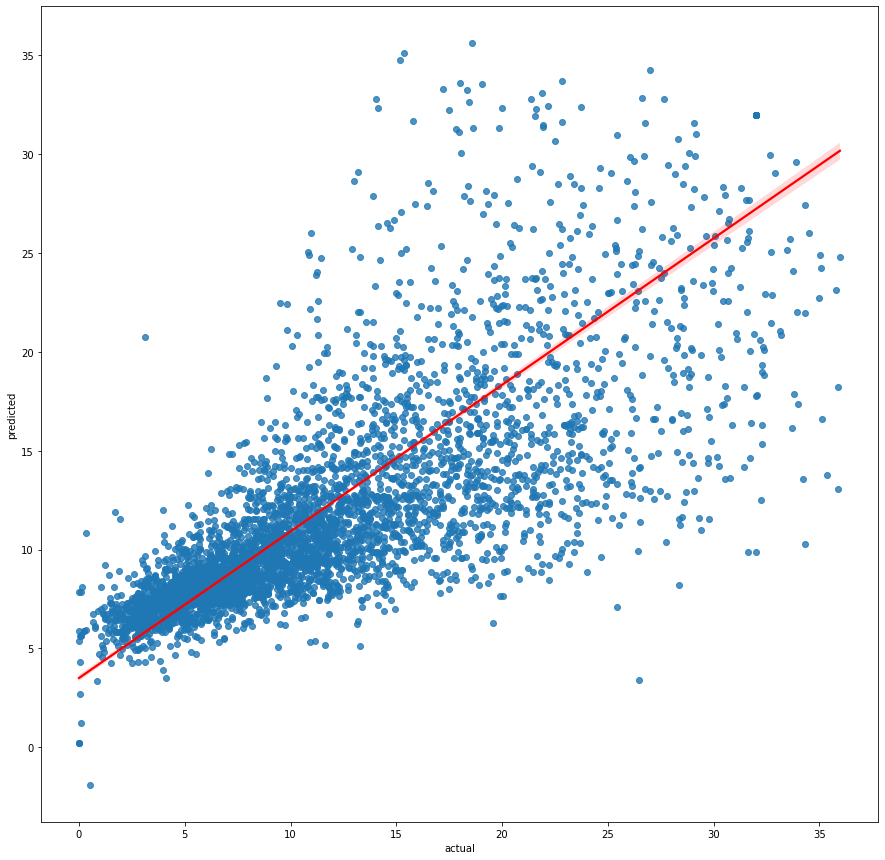

In [69]:
# Scatterplot visual predicted over actual
plot = plt.figure()
plot.set_figwidth(15)
plot.set_figheight(15)
sns.regplot(x='actual', y='predicted', data = results,
            line_kws = {'color': 'red'})



Text(0.5, 1.0, 'distribution of residuals')

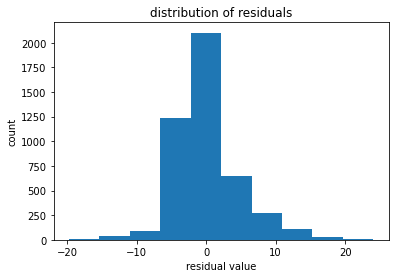

In [74]:
# residual distribution

plt.hist(results['residual'])
plt.xlabel('residual value')
plt.ylabel('count')
plt.title("distribution of residuals")

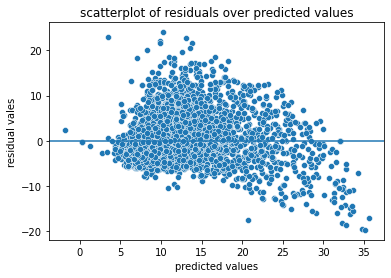

In [78]:
#scatterplot of `residuals` over `predicted`
sns.scatterplot(x = 'predicted', y = 'residual', data = results)
plt.axhline(0)
plt.xlabel('predicted values')
plt.ylabel('residual vales')
plt.title('scatterplot of residuals over predicted values')
plt.show()

Linear Regression is a powerful tool for 1 continous dependent variable when comparing it to many independent variables.